In [2]:
import pandas as pd
import ast
import cv2


def get_bbox(annots):
    bboxes = [list(annot.values()) for annot in annots]
    return bboxes

train_df = pd.read_csv("train.csv")
train_df['annotations'] = train_df['annotations'].apply(lambda x: ast.literal_eval(x))
train_df['num_bbox'] = train_df['annotations'].apply(lambda x: len(x))
train_df = train_df.query('num_bbox>0')
train_df['bboxes'] = train_df.annotations.apply(get_bbox)
train_df.head(2)

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,num_bbox,bboxes
16,0,40258,16,16,0-16,"[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]",1,"[[559, 213, 50, 32]]"
17,0,40258,17,17,0-17,"[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]",1,"[[558, 213, 50, 32]]"


C:\Users\msi\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


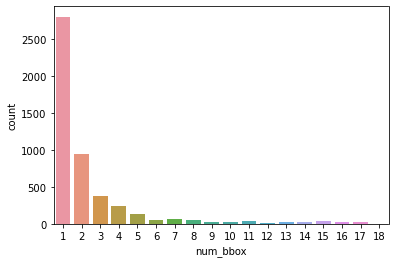

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

_ = sns.countplot(train_df.num_bbox)

In [4]:
len(train_df.query('num_bbox == 11')) / len(train_df)

0.0089449075015247

(720, 1280, 3)


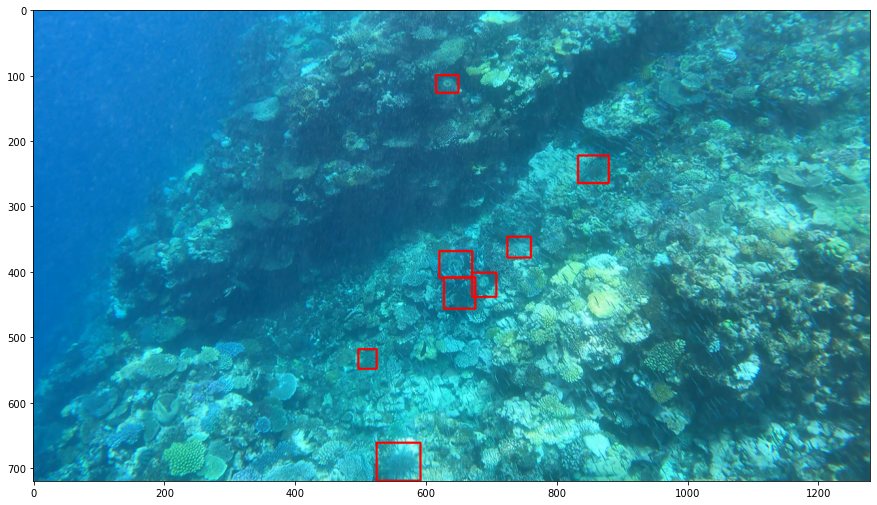

In [6]:

def draw_box(img, bboxes):
    for b in bboxes:
        x, y, w, h = b
        p2, p1 = (x, y), (x + w, y + h)
        cv2.rectangle(img, p1, p2, (255, 0, 0), thickness=2, lineType=cv2.LINE_AA)

sample = train_df.query('num_bbox == 8').sample(1)
image_id, bboxes = sample[["image_id", "bboxes"]].values[0]

img = cv2.imread(f"images/video_{image_id.replace('-', '_')}.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
draw_box(img, bboxes)
plt.figure(figsize=(15, 15))
plt.imshow(img)

In [ ]:
## Create crop data

